# M2 fouille de données avancée

## Poblématique : Analyse et prédiction de l'évolution des prix de vente des appartements par commune au Luxembourg 

### Objectifs :
- Analyser les facteurs déterminants influençant l'évolution des prix de l'immobilier.

- Créer un modèle prédictif permettant d'anticiper les tendances futures du marché immobilier.


Données nécessaires :
1.	Prix de l'immobilier sur 10 ans par commune. 
2.	Salaire moyenne par commune. 
3.	Densité d’habitation par commune.  
4.	Données sur l'offre de logements (nouvelles constructions).  
5.	Données sur les transports et la mobilité (infrastructures de transport, accessibilité). 


Approches :

1. Collecte des données via le portail data.public.lu. (https://data.public.lu/fr/datasets/prix-de-vente-des-appartements-par-commune/#resources)
2. Analyse exploratoire des données (EDA) pour comprendre les tendances et corrélations.
3. Modélisation prédictive pour anticiper l'évolution des prix en utilisant de la régression linéaire et non linéaire.
4. Analyse géospatiale pour visualiser la répartition des prix et identifier les zones d'intérêt.


Résultats attendus :

1. Une carte interactive illustrant les prix de l'immobilier par commune.
2. Des insights sur les facteurs déterminants des variations de prix.


In [165]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [148]:
# Importing the dataset
df = pd.read_csv('../dataset/dataset1.csv')
df['Prix moyen au m².1'] = df['Prix moyen au m².1'].str.replace(' ', '')
df['Prix moyen au m².1'] = df['Prix moyen au m².1'].astype(float)
df['Prix moyen au m²'] = df['Prix moyen au m²'].str.replace(' ', '')
df['Prix moyen au m²'] = df['Prix moyen au m²'].astype(float)
print(df.describe())
print(df.info())

       Nombre de ventes  Prix moyen au m²  Nombre de VEFA  Prix moyen au m².1  \
count        227.000000        227.000000      227.000000          227.000000   
mean          62.797357       5767.718062       38.162996         6651.933921   
std           68.680570       1708.771514       31.313641         1872.181922   
min           10.000000       3106.000000       10.000000         3518.000000   
25%           21.000000       4517.500000       16.000000         5343.000000   
50%           40.000000       5191.000000       27.000000         6120.000000   
75%           68.500000       6771.000000       46.500000         7713.500000   
max          343.000000      11639.000000      187.000000        13288.000000   

       Densité par km²        Année  Salaire moyen  
count       227.000000   227.000000     227.000000  
mean        520.533128  2018.083700    5290.635374  
std         476.300794     2.539432    1554.683768  
min          51.500000  2014.000000    3092.260000  
25%  

Text(0.5, 1.0, 'Distribution des prix moyens au m²')

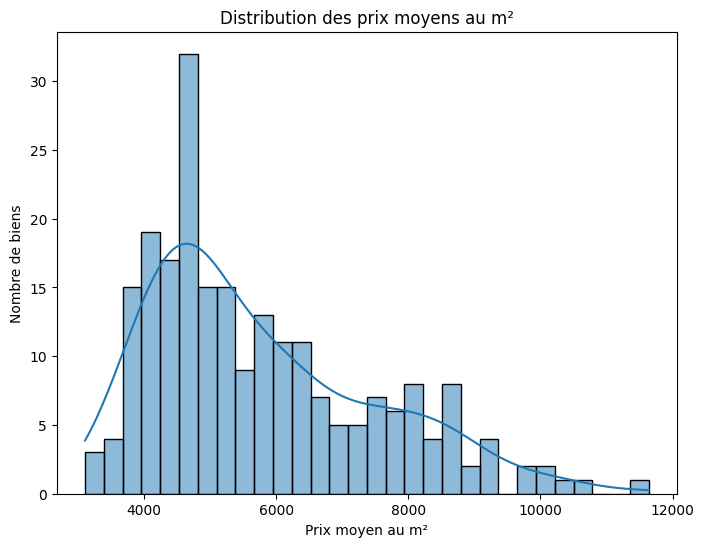

In [149]:
# Distribution du prix au m²
plt.figure(figsize=(8,6))
sns.histplot(df['Prix moyen au m²'], bins=30, kde=True)
plt.ylabel('Nombre de biens')
plt.title('Distribution des prix moyens au m²')

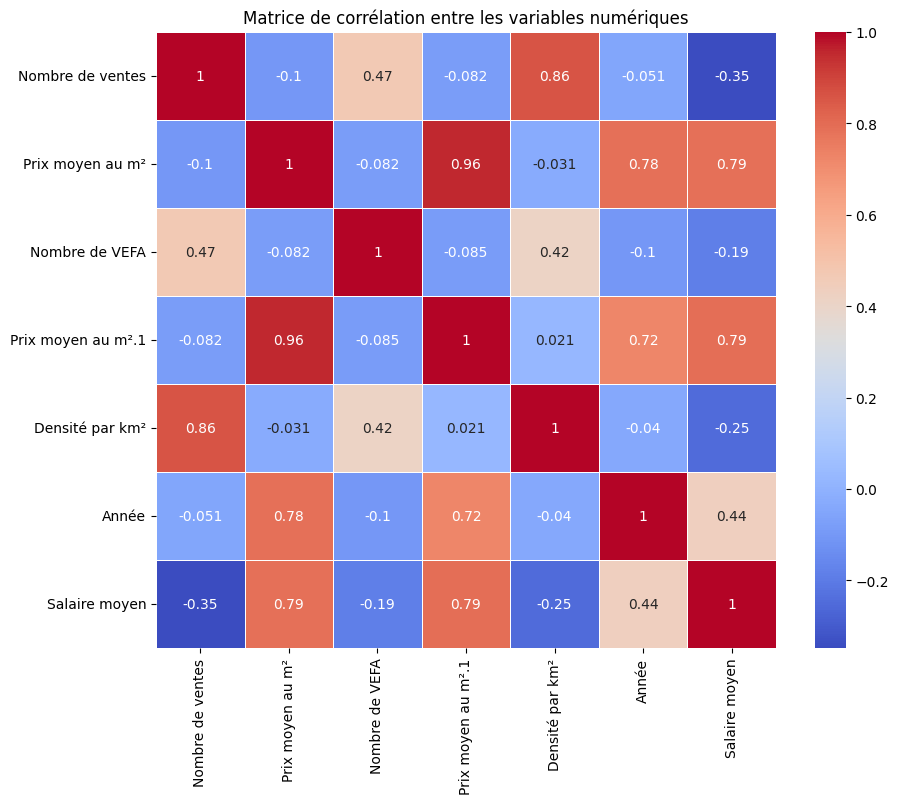

In [150]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Calculer la matrice de corrélation uniquement sur ces colonnes
plt.figure(figsize=(10, 8))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()


Text(0.5, 1.0, 'Relation entre le salaire moyen et le prix au m²')

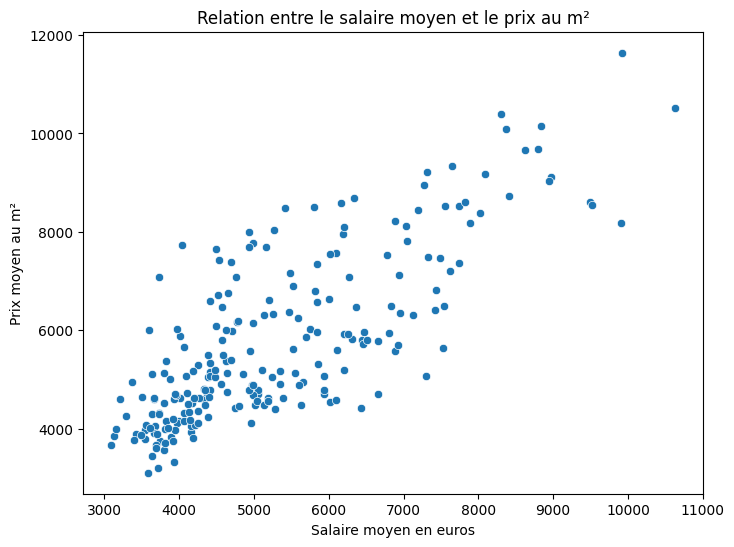

In [151]:
# Scatter plot entre prix au m² et salaire moyen par commune
plt.figure(figsize=(8,6))
sns.scatterplot(x='Salaire moyen', y='Prix moyen au m²', data=df)
# renommer x
plt.xlabel('Salaire moyen en euros')
plt.title('Relation entre le salaire moyen et le prix au m²')

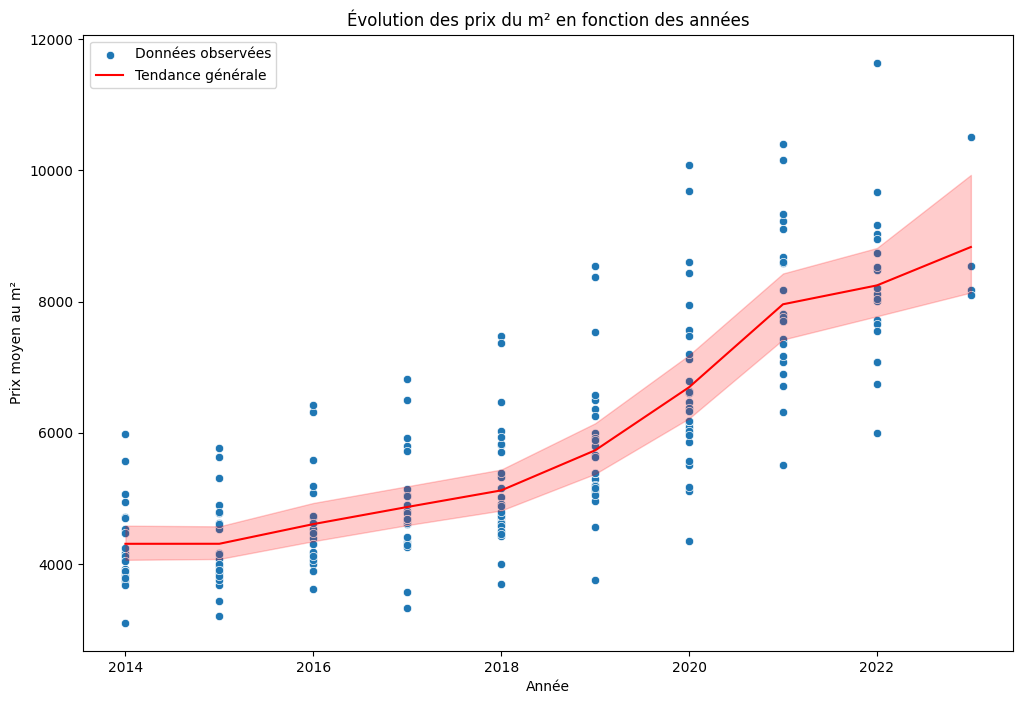

In [152]:
# Combinaison scatter plot et line plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Année', y='Prix moyen au m²', data=df, label='Données observées')
sns.lineplot(x='Année', y='Prix moyen au m²', data=df, color='red', label='Tendance générale')
plt.title('Évolution des prix du m² en fonction des années')
plt.xlabel('Année')
plt.ylabel('Prix moyen au m²')
plt.legend()
plt.show()


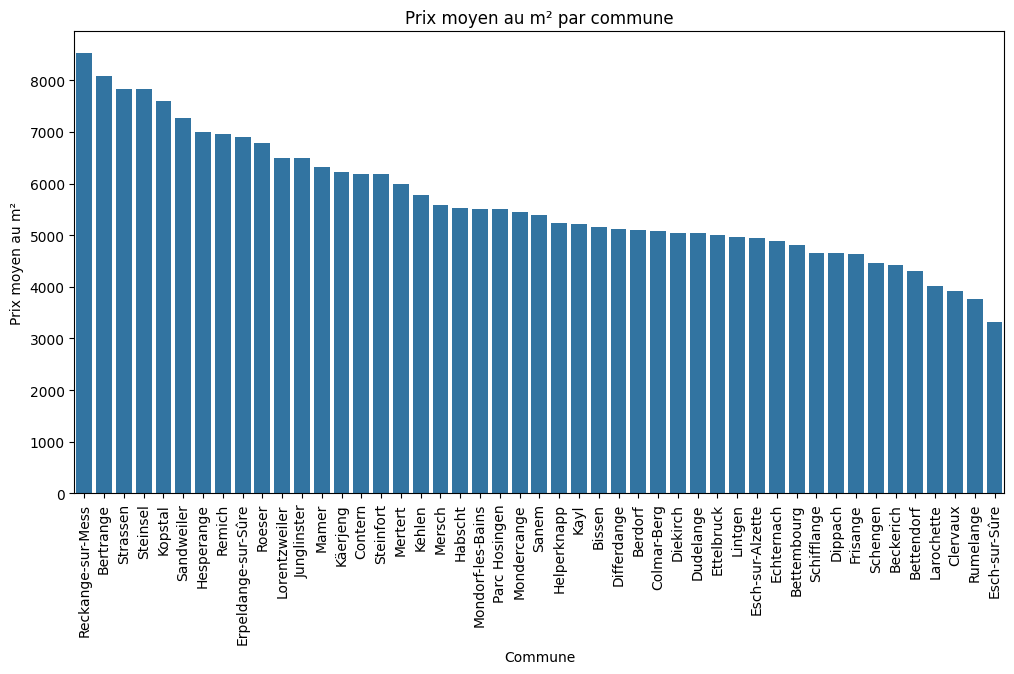

In [153]:
plt.figure(figsize=(12, 6))
avg_price_per_commune = df.groupby('Commune')['Prix moyen au m²'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_per_commune.index, y=avg_price_per_commune.values)
plt.xticks(rotation=90)
plt.title('Prix moyen au m² par commune')
plt.xlabel('Commune')
plt.ylabel('Prix moyen au m²')
plt.show()


In [154]:
df.columns
# Sélection des features et de la target
X = df[['Commune', 'Nombre de ventes', 'Nombre de VEFA','Prix moyen au m².1', 'Densité par km²', 'Année', 'Salaire moyen']]
y = df['Prix moyen au m²']

# Encodage des variables catégorielles
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding pour les communes

# Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [155]:
# Modèle de régression linéaire
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Prédictions
y_pred = linear_regressor.predict(X_test)

# Evaluation du modèle
mseRL = mean_squared_error(y_test, y_pred)
r2RL = r2_score(y_test, y_pred)

print(f'MSE: {mseRL}')
print(f'R2: {r2RL}')

MSE: 189708.86258322714
R2: 0.9194197126901941


In [156]:
# Modèle Random Forest
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_regressor.predict(X_test)

mseRF = mean_squared_error(y_test, y_pred_rf)
r2RF = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (MSE) RF: {mseRF}')
print(f'R2 RF: {r2RF}')


Mean Squared Error (MSE) RF: 149563.590876087
R2 RF: 0.9364717232512314


In [157]:
# Modèle Gradient Boosting
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train, y_train)

# Prédictions
y_pred_gb = gb_regressor.predict(X_test)

mseGB = mean_squared_error(y_test, y_pred_gb)
r2GB = r2_score(y_test, y_pred_gb)

print(f'Mean Squared Error (MSE) GB: {mseGB}')
print(f'R2 GB: {r2GB}')


Mean Squared Error (MSE) GB: 134470.98428534754
R2 GB: 0.9428824230929539


In [158]:
# Modèle SVR
svr_regressor = SVR(kernel='rbf')  # kernel='rbf' est souvent utilisé pour des modèles non linéaires
svr_regressor.fit(X_train, y_train)

# Prédictions
y_pred_svr = svr_regressor.predict(X_test)

# Évaluation
mseSVR = mean_squared_error(y_test, y_pred_svr)
r2SVR = r2_score(y_test, y_pred_svr)
print(f'Mean Squared Error (SVR): {mean_squared_error(y_test, y_pred_svr)}')
print(f'R² Score (SVR): {r2_score(y_test, y_pred_svr)}')


Mean Squared Error (SVR): 2484796.662602125
R² Score (SVR): -0.05543634731922609


In [159]:
# Exemple de valeurs pour 2025 (à ajuster en fonction des estimations réelles)
data_2025 = {
    'Année': 2025,
    'Nombre de ventes': 49,
    'Nombre de VEFA': 17,
    'Prix moyen au m².1': 12797.0,
    'Densité par km²': 993.94, 
    'Salaire moyen': 10628.87,
}

# Créer un DataFrame avec ces valeurs pour 2025
X_2025 = pd.DataFrame([data_2025])

# Ajouter une colonne pour la commune encodée
X_2025['Commune_Strassen'] = 1  # Strassen

# Ajouter les autres communes avec 0
for commune in X_train.columns:
    if commune not in X_2025.columns:
        X_2025[commune] = 0

# Réorganiser les colonnes de X_2025 pour correspondre à l'ordre de X_train
X_2025 = X_2025[X_train.columns]

# Utiliser le modèle sélectionné (par exemple, RandomForestRegressor) pour faire la prédiction
prix_pred_2025 = rf_regressor.predict(X_2025)

print(f'Le prix moyen estimé par Random Forest au m² à Strassen en 2025 est : {prix_pred_2025[0]:.2f} €')


Le prix moyen estimé par Random Forest au m² à Strassen en 2025 est : 10417.66 €


In [168]:
# Fonction pour effectuer une validation croisée et afficher les scores MSE et R²
def evaluate_model(model, X, y):
    # Utilisation de cross_validate pour obtenir plusieurs scores
    scores = cross_validate(model, X, y, cv=5, scoring=('neg_mean_squared_error', 'r2'), return_train_score=False)
    
    # Calcul des moyennes des scores
    mse_scores = np.mean(scores['test_neg_mean_squared_error'])
    r2_scores = np.mean(scores['test_r2'])
    
    return -mse_scores, r2_scores  # La MSE est négative, donc on la change en positive

# Validation croisée pour la régression linéaire
mseRL_cv, r2RL_cv = evaluate_model(linear_regressor, X, y)
mseRF_cv, r2RF_cv = evaluate_model(rf_regressor, X, y)
mseGB_cv, r2GB_cv = evaluate_model(gb_regressor, X, y)
mseSVR_cv, r2SVR_cv = evaluate_model(svr_regressor, X, y)

print(f'Linear Regression CV MSE: {mseRL_cv}, R2: {r2RL_cv}')
print(f'Random Forest CV MSE: {mseRF_cv}, R2: {r2RF_cv}')
print(f'Gradient Boosting CV MSE: {mseGB_cv}, R2: {r2GB_cv}')
print(f'SVR CV MSE: {mseSVR_cv}, R2: {r2SVR_cv}')

Linear Regression CV MSE: 321039.1641380146, R2: 0.5848799230744032
Random Forest CV MSE: 356162.63831627055, R2: 0.6624160119031149
Gradient Boosting CV MSE: 301663.5115263382, R2: 0.7158407572777721
SVR CV MSE: 4209151.031978933, R2: -3.42585122438562


In [172]:
df.columns 

Index(['Commune', 'Nombre de ventes', 'Prix moyen au m²', 'Nombre de VEFA',
       'Prix moyen au m².1', 'Densité par km²', 'Année', 'Salaire moyen'],
      dtype='object')

In [188]:
# utiliser le dataset2 pour prédire le prix au m²
df2 = pd.read_csv('../dataset/dataset2.csv')
if df2['Prix moyen au m²'].dtype == 'object':
    df2['Prix moyen au m²'] = df2['Prix moyen au m²'].str.replace(' ', '')
    df2['Prix moyen au m²'] = df2['Prix moyen au m²'].astype(float)


In [191]:
# Sélection des features et de la target
X2 = df2[['Commune', 'Nombre de ventes', 'Nombre de VEFA', 'Densité par km²', 'Année', 'Salaire moyen']]
y2 = df2['Prix moyen au m²']

# Encodage des variables catégorielles
X2 = pd.get_dummies(X2, drop_first=True)  # One-hot encoding pour les variables catégorielles

# Modèles
linear_regressor = LinearRegression()
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
svr_regressor = SVR(kernel='rbf')

# Entraînement des modèles
linear_regressor.fit(X2, y2)
rf_regressor.fit(X2, y2)
gb_regressor.fit(X2, y2)
svr_regressor.fit(X2, y2)

# Prédictions
y_pred_dataset2_LR = linear_regressor.predict(X2)
y_pred_dataset2_RF = rf_regressor.predict(X2)
y_pred_dataset2_GB = gb_regressor.predict(X2)
y_pred_dataset2_SVR = svr_regressor.predict(X2)

# Validation croisée et évaluation
mseLR2_cv, r2LR2_cv = evaluate_model(linear_regressor, X2, y2)
mseRF2_cv, r2RF2_cv = evaluate_model(rf_regressor, X2, y2)
mseGB2_cv, r2GB2_cv = evaluate_model(gb_regressor, X2, y2)
mseSVR2_cv, r2SVR2_cv = evaluate_model(svr_regressor, X2, y2)

print(f'Linear Regression CV MSE: {mseLR2_cv}, R2: {r2LR2_cv}')
print(f'Random Forest CV MSE: {mseRF2_cv}, R2: {r2RF2_cv}')
print(f'Gradient Boosting CV MSE: {mseGB2_cv}, R2: {r2GB2_cv}')
print(f'SVR CV MSE: {mseSVR2_cv}, R2: {r2SVR2_cv}')


Linear Regression CV MSE: 597949.1307424757, R2: 0.10224636695258346
Random Forest CV MSE: 342298.4361084091, R2: 0.6155060237049923
Gradient Boosting CV MSE: 302756.7118182272, R2: 0.6568006428281751
SVR CV MSE: 4544423.151597714, R2: -4.56135892401003


In [192]:
# Comparer les diffrents modèles dans un tableau
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR']
mse = [mseRL, mseRF, mseGB, mseSVR]
r2 = [r2RL, r2RF, r2GB, r2SVR]
tab = pd.DataFrame({'Modèle': models, 'MSE': mse, 'R²': r2})
print(tab)

              Modèle           MSE        R²
0  Linear Regression  1.897089e+05  0.919420
1      Random Forest  1.495636e+05  0.936472
2  Gradient Boosting  1.344710e+05  0.942882
3                SVR  2.484797e+06 -0.055436


# Comparaisons des modèles 
- Le Gradient Boosting est le modèle le plus performant avec une meilleure capacité à généraliser les données, comme le montrent les résultats de la validation croisée.
- Le Random Forest est également un bon candidat, bien qu'il présente une légère baisse de performance en validation croisée par rapport au Gradient Boosting.